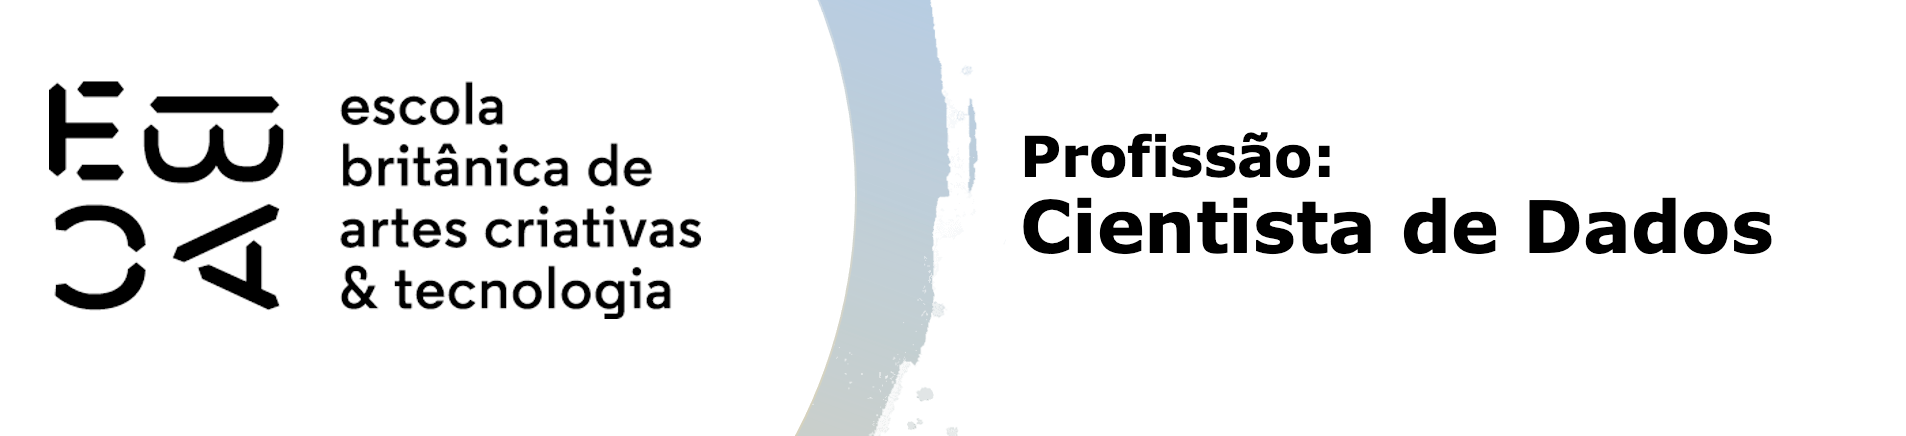

# Tarefa

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo é tentar agrupar os clientes conforme seu comportamento de navegação entre páginas administrativas, informativas e de produtos. 

As variáveis estão descritas abaixo (em tradução livre do link indicado).

Por este motivo, o escopo desta análise estará fechado nas primeiras seis variáveis da tabela, referentes a quantidade e tempo de acesso por tipo de página, atributos que falam mais do comportamento de navegação do cliente que de características da página o da época do ano.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from tqdm.notebook import tqdm

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./input/online_shoppers_intention.csv')

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
df.Revenue.value_counts(dropna=False)

Revenue
False    10422
True      1908
Name: count, dtype: int64

## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
df.nunique()

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

In [7]:
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [8]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [9]:
colunas = df.iloc[:, 0:6].columns
df[colunas].head(0)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration


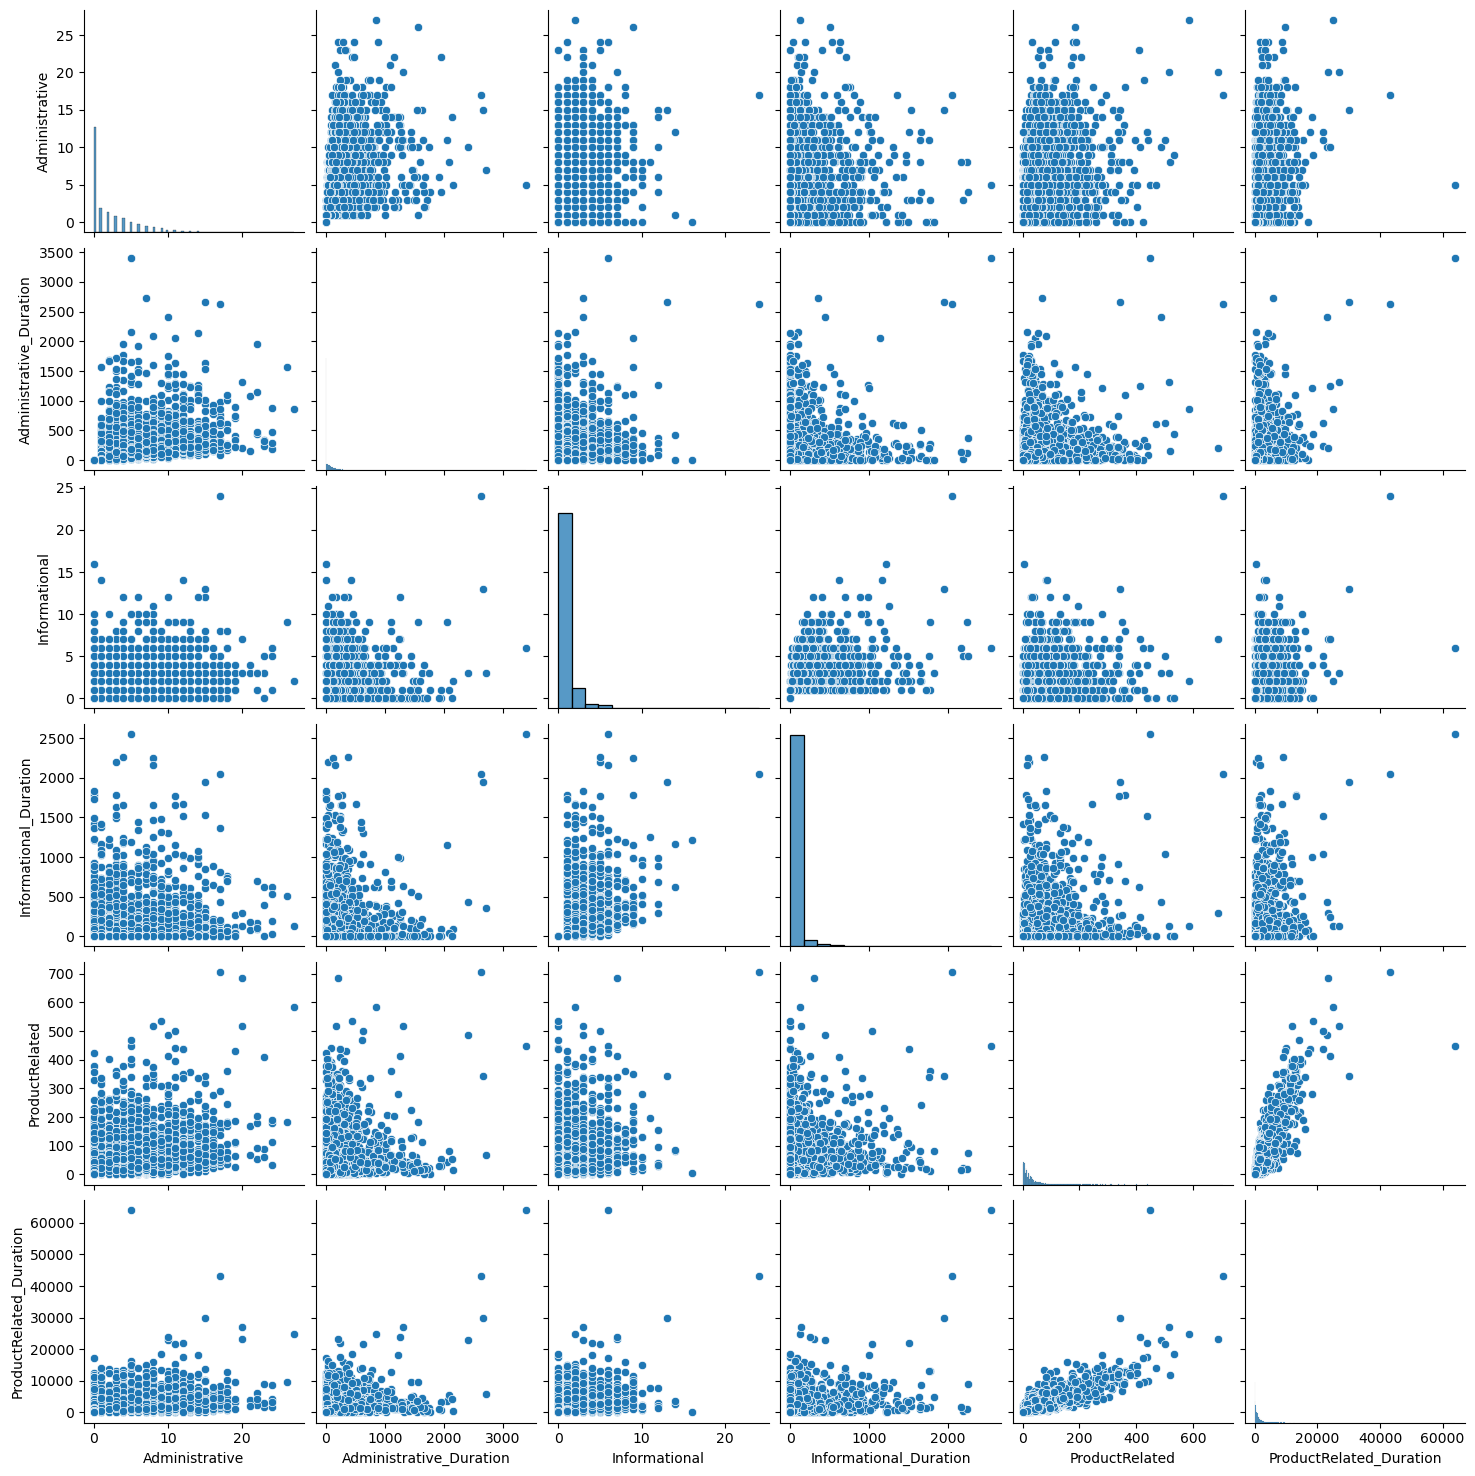

In [10]:
sns.pairplot(data=df[colunas])
plt.show()

Ao observar o gráfico, inicialmente não foram identificados agrupamentos (densidade de amostras) relevantes nesta primeira análise. Entretanto, é importante ressaltar que, até o momento, nenhuma padronização foi aplicada às variáveis. A falta de padronização pode levar a algumas variáveis exercerem maior influência na distância entre os pontos, de acordo com a escala utilizada. Isso pode prejudicar a futura identificação de agrupamentos de forma equitativa, uma vez que variáveis com escalas mais amplas podem dominar o processo de clusterização em detrimento de outras com escalas menores. Portanto, antes de realizar o processo de clusterização, é recomendado aplicar a padronização (normalização) das variáveis, a fim de que todas contribuam igualmente para a formação dos agrupamentos. Essa etapa permitirá uma análise mais justa e precisa dos padrões inerentes aos dados, levando a uma clusterização mais confiável e significativa.

In [11]:
df_pdr = df.copy()

colunas_num = df_pdr.select_dtypes(include = 'number').columns

df_pdr[colunas_num] = pd.DataFrame(data=StandardScaler().fit_transform(df_pdr[colunas_num]), 
                                   columns=df_pdr[colunas_num].columns)

df_pdr

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,Feb,-1.233426,-0.790293,-0.894178,-0.762629,Returning_Visitor,False,False
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,Feb,-0.136078,-0.207952,-0.894178,-0.514182,Returning_Visitor,False,False
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,Feb,2.058618,-0.790293,2.437081,-0.265735,Returning_Visitor,False,False
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,-0.308821,Feb,0.961270,-0.207952,-0.477771,-0.017289,Returning_Visitor,False,False
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,Feb,0.961270,0.374389,-0.894178,-0.017289,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.206173,0.363075,-0.396478,-0.244931,0.478227,0.307822,-0.310366,-0.288966,0.342125,-0.308821,Dec,2.058618,2.121412,-0.894178,-0.762629,Returning_Visitor,True,False
12326,-0.696993,-0.457191,-0.396478,-0.244931,-0.601062,-0.380957,-0.457683,-0.447364,-0.317178,-0.308821,Nov,0.961270,-0.207952,-0.894178,0.976499,Returning_Visitor,True,False
12327,-0.696993,-0.457191,-0.396478,-0.244931,-0.578577,-0.528063,1.261014,0.897093,-0.317178,-0.308821,Nov,0.961270,-0.207952,-0.894178,2.218733,Returning_Visitor,True,False
12328,0.507228,-0.032916,-0.396478,-0.244931,-0.376210,-0.443536,-0.457683,-0.453140,-0.317178,-0.308821,Nov,-0.136078,-0.207952,-0.061364,1.721839,Returning_Visitor,False,False


In [12]:
df_pdr.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04
mean,-2.996612e-17,6.281359e-17,-4.610172e-18,-2.535595e-17,4.610172e-17,-8.298309e-17,-6.454241e-17,3.688137e-17,1.060340e-16,-5.532206e-17,4.610172e-18,1.498306e-17,7.722038e-17,-2.996612e-17
std,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00
min,-6.969930e-01,-4.571914e-01,-3.964779e-01,-2.449305e-01,-7.134884e-01,-6.243475e-01,-4.576830e-01,-8.863706e-01,-3.171778e-01,-3.088214e-01,-1.233426e+00,-7.902929e-01,-8.941785e-01,-7.626290e-01
25%,-6.969930e-01,-4.571914e-01,-3.964779e-01,-2.449305e-01,-5.560920e-01,-5.281214e-01,-4.576830e-01,-5.923930e-01,-3.171778e-01,-3.088214e-01,-1.360783e-01,-2.079519e-01,-8.941785e-01,-5.141822e-01
50%,-3.959377e-01,-4.147639e-01,-3.964779e-01,-2.449305e-01,-3.087548e-01,-3.113566e-01,-3.934903e-01,-3.686913e-01,-3.171778e-01,-3.088214e-01,-1.360783e-01,-2.079519e-01,-6.136354e-02,-5.141822e-01
75%,5.072280e-01,7.035981e-02,-3.964779e-01,-2.449305e-01,1.409492e-01,1.407881e-01,-1.109348e-01,1.425510e-01,-3.171778e-01,-3.088214e-01,9.612698e-01,-2.079519e-01,3.550439e-01,-1.728851e-02
max,7.431499e+00,1.876956e+01,1.849960e+01,1.786868e+01,1.513858e+01,3.280678e+01,3.667189e+00,3.229316e+00,1.916634e+01,4.718598e+00,6.448010e+00,6.197799e+00,2.437081e+00,3.957861e+00


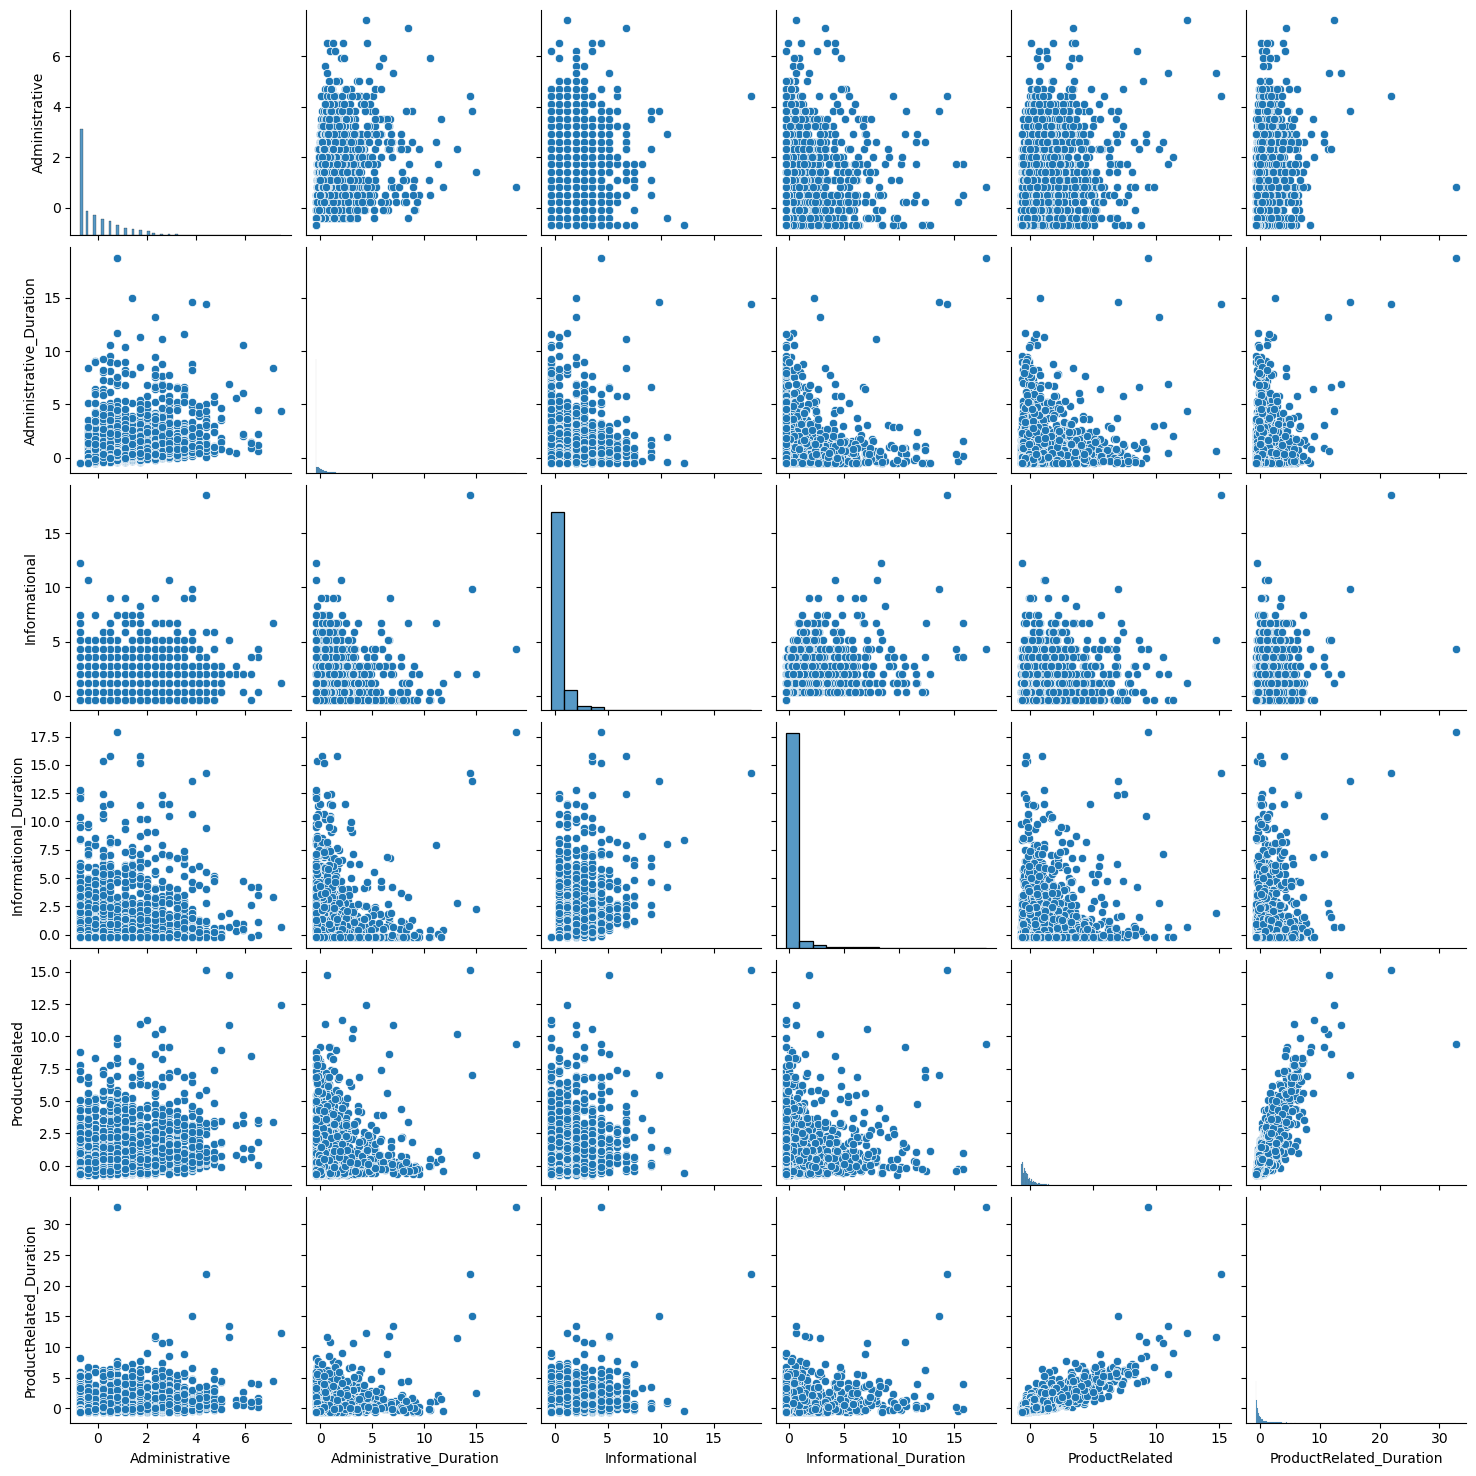

In [13]:
sns.pairplot(data = df_pdr[colunas])
plt.show()

Após padronizar as variáveis, ainda não há agrupamentos visuais significativos no gráfico. É importante destacar que a aplicação da padronização tem o propósito de equilibrar a influência das variáveis, permitindo que todas contribuam de maneira equitativa para a formação dos agrupamentos. A padronização é apenas o primeiro passo para uma clusterização precisa.

## Número de grupos

Utilize as técnicas vistas em aula que te ajudem a decidir pelo número de grupos a ser utilizados.

  0%|          | 0/10 [00:00<?, ?it/s]

   n_clusters           sqd
0           1  73980.000000
1           2  51211.613851
2           3  43203.306554
3           4  37464.139172
4           5  33649.994186
5           6  30822.463434
6           7  26849.055157
7           8  25202.146626
8           9  22727.184999
9          10  21096.664471


Text(0.5, 1.0, 'Metodo cotovelo para determinar numero de clusters')

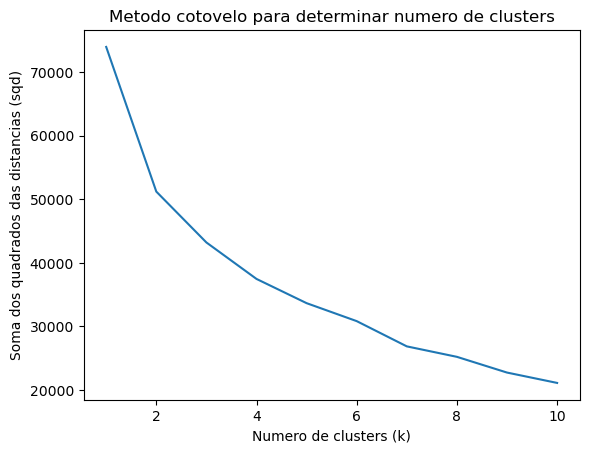

In [14]:
sqd = []
k = 10

for k in tqdm(range(1, k + 1)):
    km = KMeans(n_clusters = k, n_init = 'auto')
    km = km.fit(df_pdr[colunas])
    sqd.append(km.inertia_)
    
df_sqd = pd.DataFrame(data = {'n_clusters': list(range(1, len(sqd) + 1)), 'sqd': sqd})
print(df_sqd)

plt.plot(df_sqd['n_clusters'], df_sqd['sqd'])
plt.xlabel('Numero de clusters (k)')
plt.ylabel('Soma dos quadrados das distancias (sqd)')
plt.title('Metodo cotovelo para determinar numero de clusters')

  0%|          | 0/9 [00:00<?, ?it/s]

   n_clusters  silhueta_media
0           2        0.624690
1           3        0.504676
2           4        0.506514
3           5        0.479492
4           6        0.460491
5           7        0.439622
6           8        0.445125
7           9        0.412991
8          10        0.416154


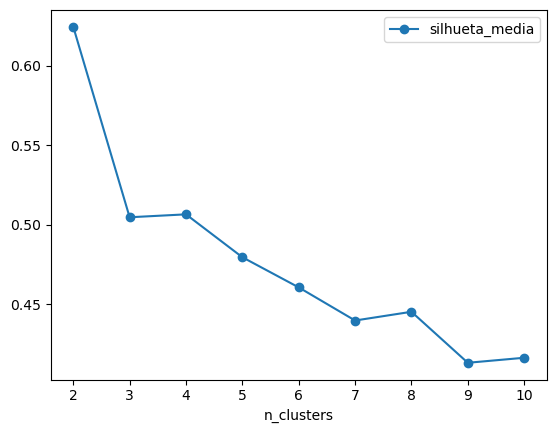

In [15]:
silhuetas = []
max_clusters = 10

for n_clusters in tqdm(range(2, max_clusters + 1)):
    km = KMeans(n_clusters = n_clusters, n_init = 'auto').fit(df_pdr[colunas])
    silhuetas.append(silhouette_score(X = df_pdr[colunas], labels = km.labels_))
    nomes_grupos = ['grupo_' + str(n) for n in range(n_clusters)]
    df_pdr['grupos_'+ str(n_clusters)] = pd.Categorical.from_codes(codes = km.labels_, categories = nomes_grupos)    

df_silhueta = pd.DataFrame(data = {'n_clusters': list(range(2, max_clusters + 1)), 
                                   'silhueta_media': silhuetas})
print(df_silhueta)

df_silhueta.plot.line(x = 'n_clusters', y = 'silhueta_media', marker = 'o')

plt.show()

## Avaliação dos grupos

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.

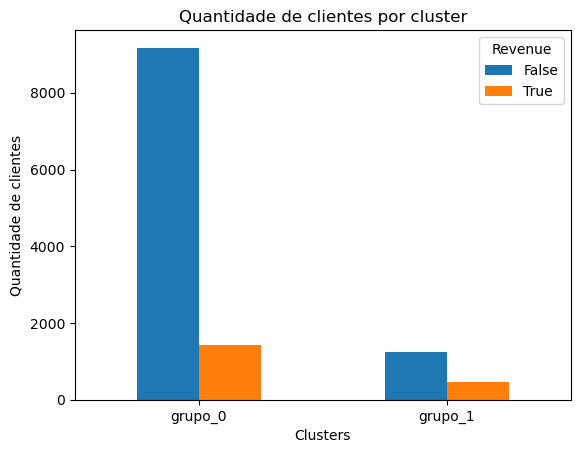

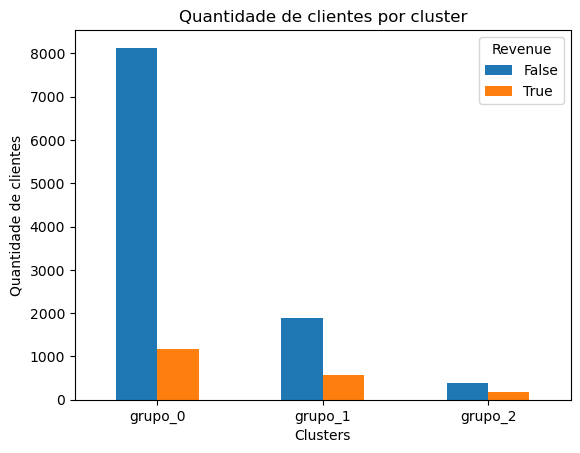

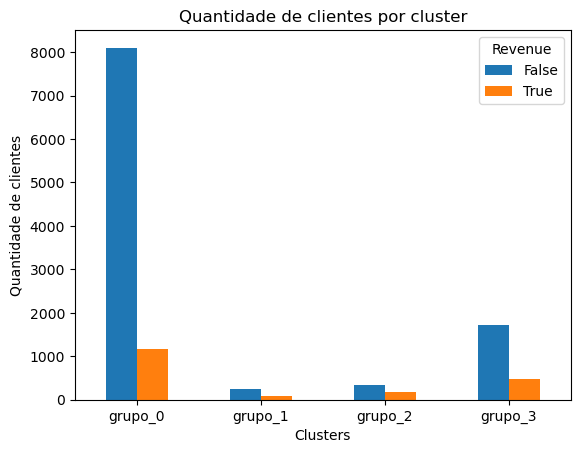

In [16]:
def cluster_barplot(data: pd.DataFrame, coluna_cluster: str) -> None:
    df_agrupado = data.groupby([coluna_cluster, 'Revenue'])['Revenue'].count().unstack()
    ax = df_agrupado.plot.bar(rot=0)
    ax.set_ylabel('Quantidade de clientes')
    ax.set_xlabel('Clusters')
    plt.title('Quantidade de clientes por cluster')
    
    plt.show()

cluster_barplot(data = df_pdr, coluna_cluster = 'grupos_2')
cluster_barplot(df_pdr, 'grupos_3')
cluster_barplot(df_pdr, 'grupos_4')

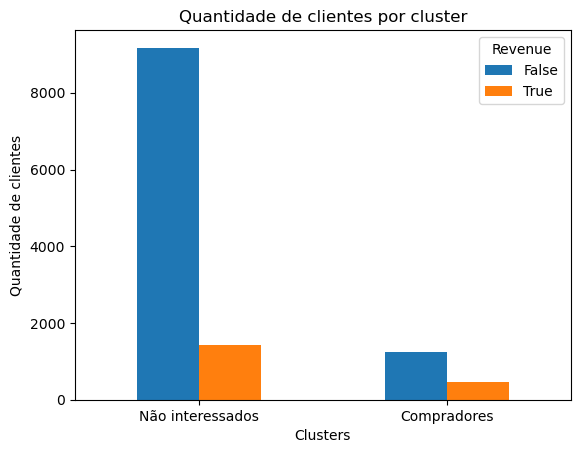

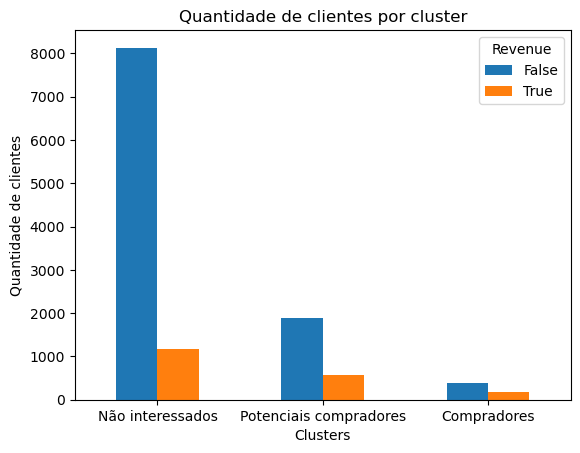

In [17]:
df_pdr_ = df_pdr.copy()

df_pdr_['grupos_2'] = df_pdr_['grupos_2'].cat.rename_categories({'grupo_0': 'Não interessados', 
                                                                 'grupo_1': 'Compradores'})

df_pdr_['grupos_3'] = df_pdr_['grupos_3'].cat.rename_categories({'grupo_0': 'Não interessados', 
                                                                 'grupo_1': 'Potenciais compradores', 
                                                                 'grupo_2': 'Compradores'})
cluster_barplot(df_pdr_, 'grupos_2')
cluster_barplot(df_pdr_, 'grupos_3')

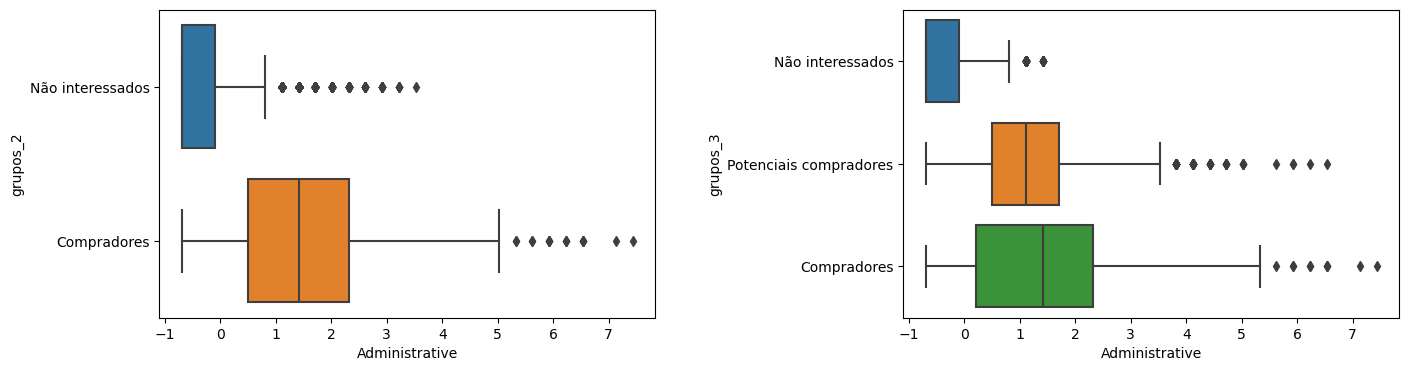

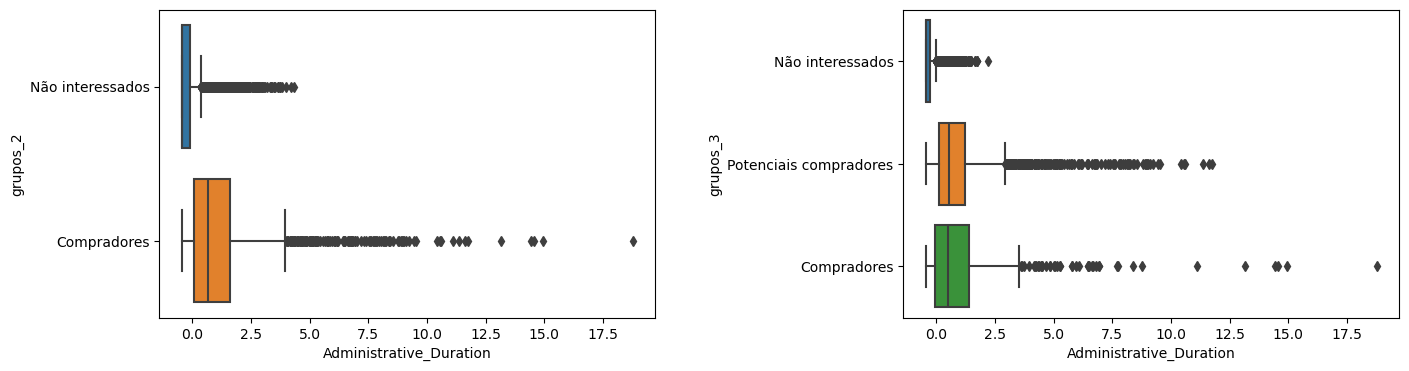

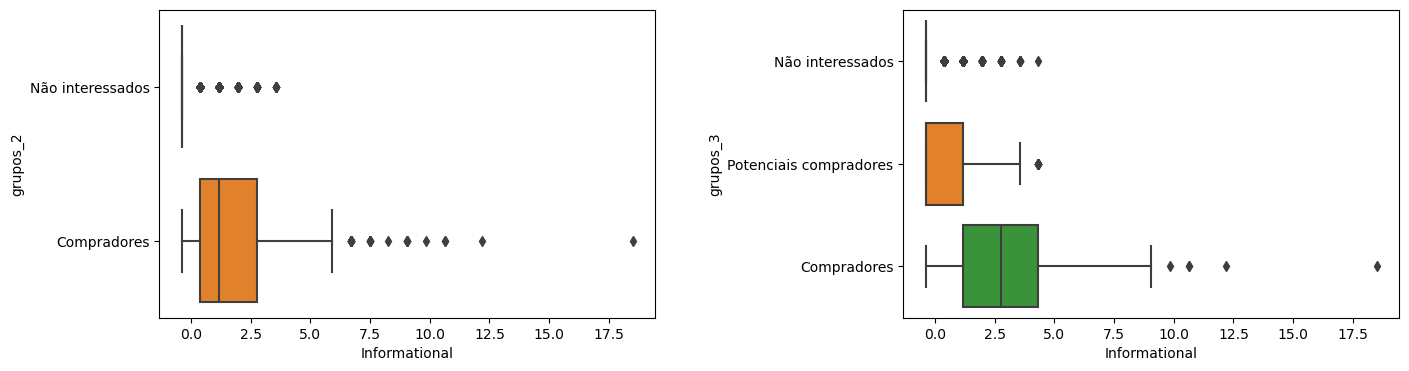

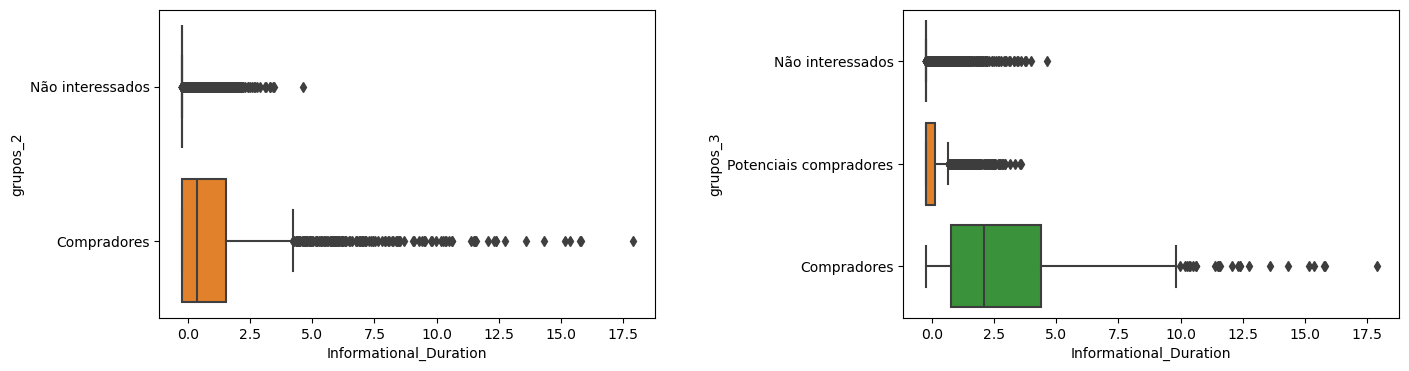

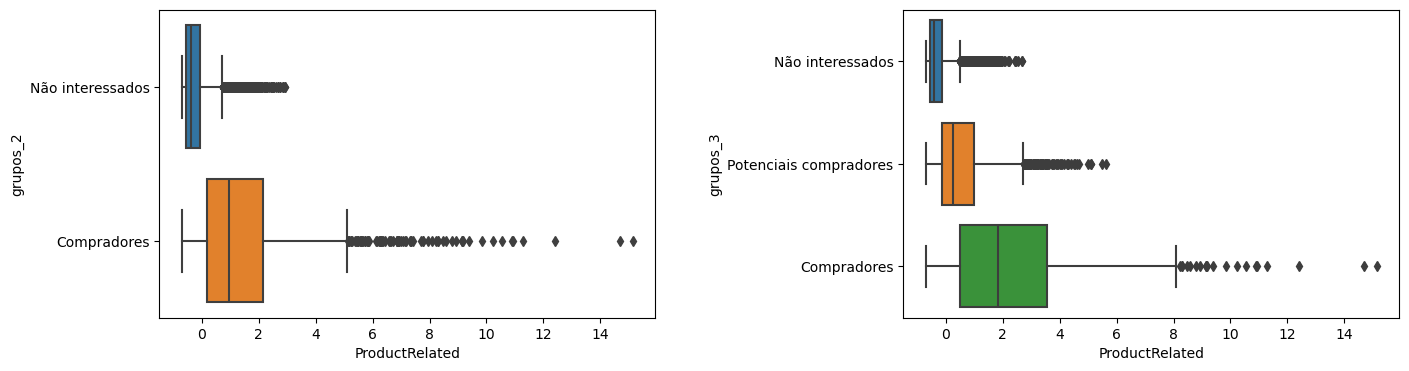

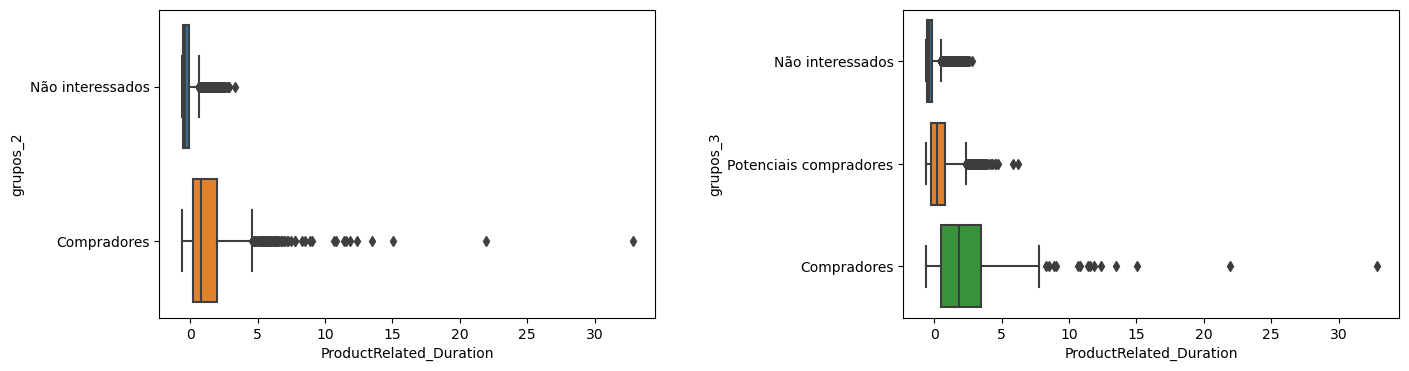

In [18]:
for n in range(6):
    fig, ax = plt.subplots(1, 2, figsize=(16, 4))
    sns.boxplot(data=df_pdr_, x=colunas[n], y='grupos_2', ax=ax[0])
    sns.boxplot(data=df_pdr_, x=colunas[n], y='grupos_3', ax=ax[1])
    plt.subplots_adjust(wspace=0.5)
    plt.show()

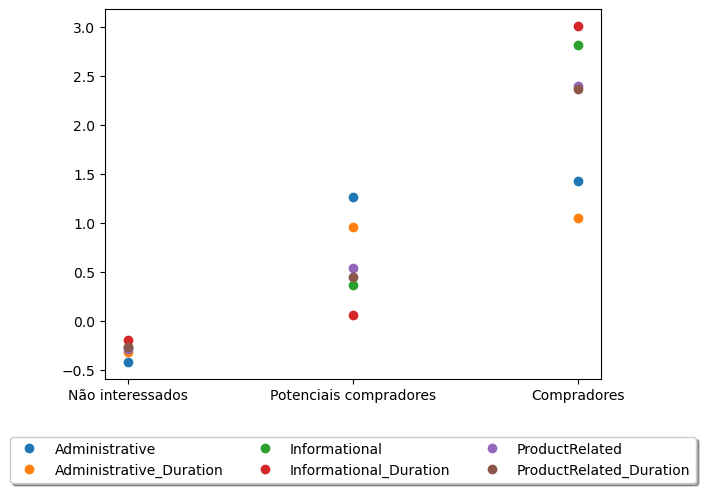

In [19]:
fig, ax = plt.subplots()
ax.plot(df_pdr_.groupby(['grupos_3'])[colunas].mean(), 'o')
ax.legend(colunas, loc='lower center', bbox_to_anchor=(0.5, -.3), ncol=3, fancybox=True, shadow=True)

plt.show()

## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*). 
- Qual grupo possui clientes mais propensos à compra?

In [20]:
pd.crosstab(df_pdr_['Revenue'], df_pdr_['grupos_2'], normalize='all', margins=True).round(decimals = 2)

grupos_2,Não interessados,Compradores,All
Revenue,,,
False,0.74,0.10,0.85
True,0.12,0.04,0.15
All,0.86,0.14,1.00


No agrupamento de 2 clusters, é possível categorizar o grupo_0 como 'Não interessados', representando os clientes com menor probabilidade de realizar compras, enquanto o grupo_1 pode ser denominado como 'Compradores', englobando os clientes com maior propensão para efetuar compras.

Apesar de haver uma discrepância na proporção de clientes classificados como False e True na variável 'Revenue', o grupo_0 foi capaz de identificar a maioria dos clientes, os quais apresentam menor propensão à compra. Este grupo conseguiu acertar cerca de 74% dos casos da base de dados onde a variável 'Revenue' é False (representando não-compradores), abrangendo 85% dos registros totais. Já o grupo_1, responsável por identificar os clientes mais inclinados a comprar, obteve um acerto aproximado de 4% dos casos onde a variável 'Revenue' é True (indicando compradores), correspondendo a 15% dos dados totais da base.

In [21]:
(df_pdr_.groupby([pd.qcut(x = df_pdr_['BounceRates'], 
                          q = 10, 
                          duplicates = 'drop'), 
                  'Revenue', 
                  'grupos_3'])
        .count()
        .mean(axis = 1)
        .to_frame()
        .unstack()
        .rename(columns={0: 'Quantidade'})
        .astype(int))

Quantidade                                   
grupos_3                 Não interessados Potenciais compradores Compradores
BounceRates      Revenue                                                    
(-0.459, -0.393] False               3925                    891         145
                 True                 817                    317          70
(-0.393, -0.31]  False                516                    350         109
                 True                  96                    124          55
(-0.31, -0.192]  False                630                    309          70
                 True                  94                     79          34
(-0.192, 0.0183] False                815                    234          50
                 True                  86                     42          13
(0.0183, 0.743]  False               1038                    103          18
                 True                  56                      9           2
(0.743, 3.667]   False               1207                     11           1
                 True                  14                      0           0

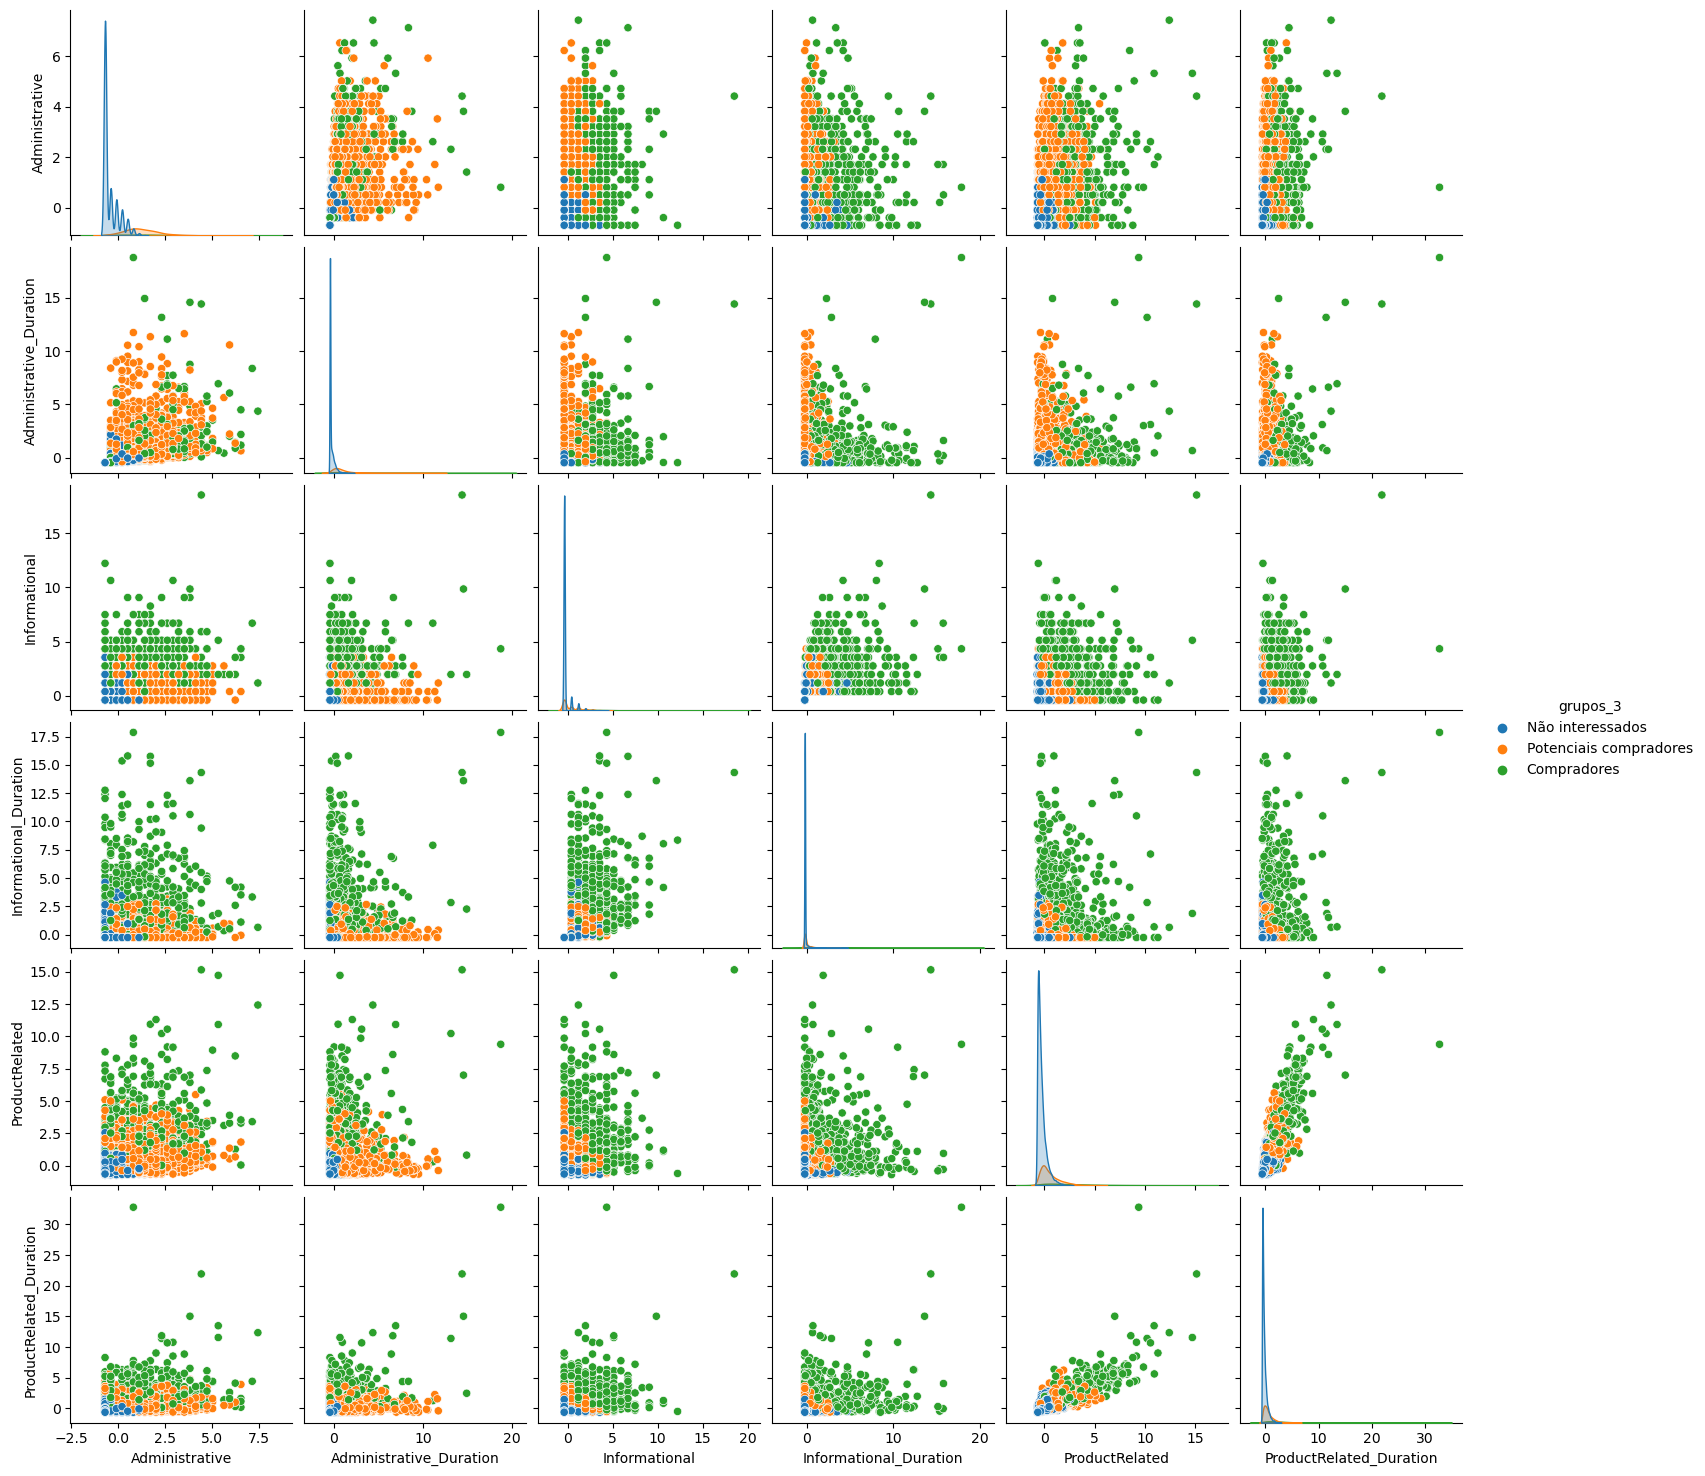

In [22]:
sns.pairplot(data=df_pdr_[list(colunas) + ['grupos_3']], hue='grupos_3')

plt.show()